# Basic Forecasting Techniques: Simple but Powerful Baselines

## Learning Objectives
By the end of this notebook, you will be able to:
1. Understand why simple forecasting methods are important
2. Implement naive, moving average, and seasonal naive forecasts
3. Compare different basic forecasting methods visually
4. Recognize when simple methods work well
5. Use basic methods as benchmarks for more complex models


## Introduction: Why Start Simple?

Before we dive into complex models like ARIMA, let's learn some simple forecasting methods. These might seem too basic, but they're actually very important!

**Why simple methods matter:**

1. **Baseline Comparison:** You need to know if a complex model is actually better than a simple one
2. **Surprisingly Good:** Simple methods often work well, especially for short-term forecasts
3. **Easy to Understand:** Stakeholders can understand "tomorrow = today" better than complex math
4. **Quick Results:** Sometimes you need a forecast fast, not a perfect forecast

**Real-World Example:** A retail manager might use "next month's sales = this month's sales" as a quick baseline. If a complex model can't beat this simple forecast, why use it?

**Think About It:** Can you think of situations where a simple forecast might be "good enough"?


In [10]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set plotting style
plt.style.use('default')

print("Libraries imported successfully")


Libraries imported successfully


In [11]:
# Load and prepare the data
data = pd.read_csv('AirPassengers.csv')
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)

# Split into training and testing sets
# We'll use 80% for training and 20% for testing
split_point = int(len(data) * 0.8)
train = data.iloc[:split_point].copy()
test = data.iloc[split_point:].copy()

print("✅ Data loaded and split successfully")
print(f"Training period: {train.index.min()} to {train.index.max()} ({len(train)} months)")
print(f"Testing period: {test.index.min()} to {test.index.max()} ({len(test)} months)")
print(f"\n💡 We'll train on the first 80% and test on the last 20%")
print("   This simulates forecasting the future using past data")


✅ Data loaded and split successfully
Training period: 1949-01-01 00:00:00 to 1958-07-01 00:00:00 (115 months)
Testing period: 1958-08-01 00:00:00 to 1960-12-01 00:00:00 (29 months)

💡 We'll train on the first 80% and test on the last 20%
   This simulates forecasting the future using past data


## Section 1: Naive Forecast

### What is a Naive Forecast?

The **naive forecast** is the simplest possible method: **Tomorrow = Today**

In other words, we predict that the next value will be the same as the last observed value.

**Why it's called "naive":** It assumes nothing changes, which seems too simple. But it's actually a surprisingly strong baseline!

### When Naive Forecasts Work Well

- **Stable data:** When values don't change much
- **Short-term forecasts:** Tomorrow is often similar to today
- **No clear patterns:** When there's no obvious trend or seasonality
- **Stock prices:** Often modeled as "random walk" (similar to naive)

**Real-World Example:** If today's temperature is 72°F, a naive forecast says tomorrow will be 72°F. This is often close enough for short-term planning!


In [12]:
# Naive forecast: All future values = last training value
naive_forecast = train['#Passengers'].iloc[-1]

# Create forecast for all test periods (they're all the same)
test['naive_forecast'] = naive_forecast

print(f"✅ Naive forecast created")
print(f"Last training value: {naive_forecast:,.0f} passengers")
print(f"Forecast for all future periods: {naive_forecast:,.0f} passengers")
print(f"\n💡 Notice: The forecast is a flat line - it doesn't change")


✅ Naive forecast created
Last training value: 491 passengers
Forecast for all future periods: 491 passengers

💡 Notice: The forecast is a flat line - it doesn't change


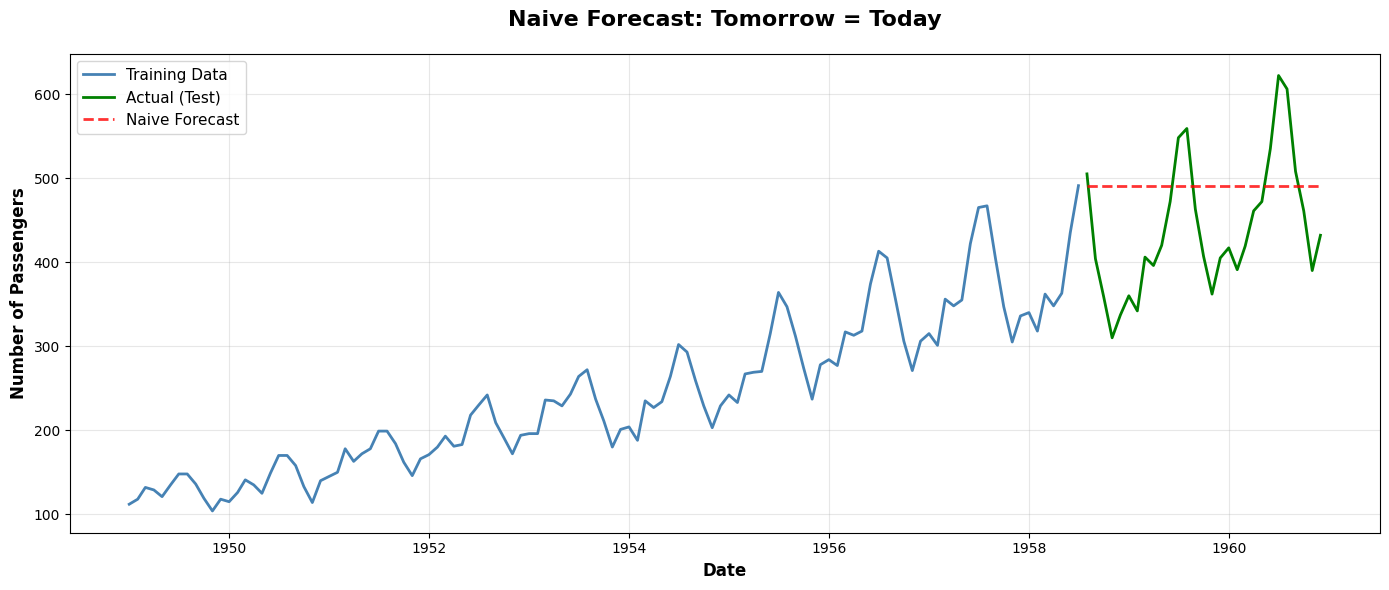


🔍 Observations:
✅ The forecast is a flat line (doesn't capture trend or seasonality)
⚠️  It misses the upward trend
⚠️  It misses the seasonal patterns

💡 This is why we call it 'naive' - but it's still a useful baseline


In [13]:
# Visualize the naive forecast
plt.figure(figsize=(14, 6))
plt.plot(train.index, train['#Passengers'], linewidth=2, color='steelblue', label='Training Data')
plt.plot(test.index, test['#Passengers'], linewidth=2, color='green', label='Actual (Test)')
plt.plot(test.index, test['naive_forecast'], linewidth=2, color='red', 
         linestyle='--', label='Naive Forecast', alpha=0.8)
plt.title('Naive Forecast: Tomorrow = Today', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Date', fontsize=12, fontweight='bold')
plt.ylabel('Number of Passengers', fontsize=12, fontweight='bold')
plt.legend(fontsize=11, loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n🔍 Observations:")
print("✅ The forecast is a flat line (doesn't capture trend or seasonality)")
print("⚠️  It misses the upward trend")
print("⚠️  It misses the seasonal patterns")
print("\n💡 This is why we call it 'naive' - but it's still a useful baseline")


## Section 2: Simple Moving Average Forecast

### What is a Moving Average?

A **moving average** forecast uses the average of the last few values to predict the next value.

**Example:** If you use a 3-month moving average, you predict next month = average of last 3 months.

**Why it works:** It smooths out short-term fluctuations and captures the recent level of the data.

### When Moving Averages Work Well

- **Stable data with noise:** Smooths out random fluctuations
- **No strong trend:** Works when data is relatively flat
- **Short-term memory:** Recent values are more relevant than old ones

**Real-World Example:** Stock analysts often use moving averages to smooth out daily price fluctuations and see the underlying trend.


In [14]:
# Simple moving average forecast
# Use the average of the last 12 months (one year)
window_size = 12
moving_avg_forecast = train['#Passengers'].tail(window_size).mean()

# Create forecast for all test periods
test['moving_avg_forecast'] = moving_avg_forecast

print(f"✅ Moving average forecast created")
print(f"Window size: {window_size} months")
print(f"Average of last {window_size} months: {moving_avg_forecast:,.0f} passengers")
print(f"Forecast for all future periods: {moving_avg_forecast:,.0f} passengers")
print(f"\n💡 This uses the average of recent history, not just the last value")


✅ Moving average forecast created
Window size: 12 months
Average of last 12 months: 376 passengers
Forecast for all future periods: 376 passengers

💡 This uses the average of recent history, not just the last value


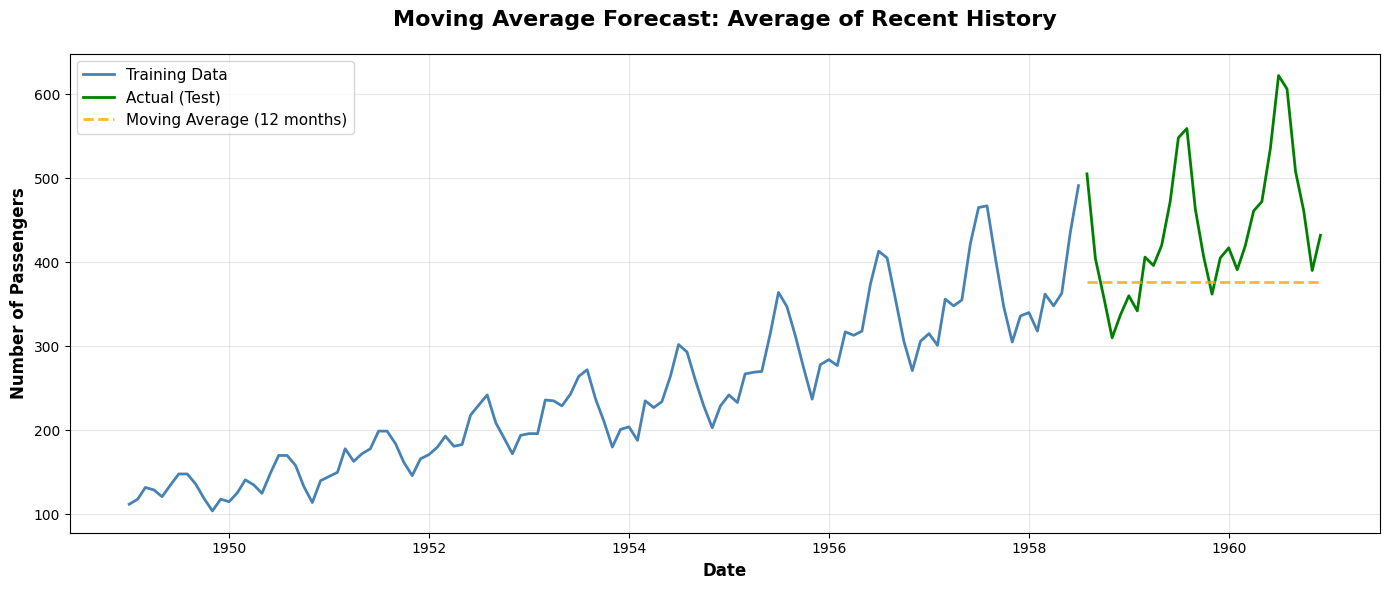


🔍 Observations:
✅ Still a flat line, but uses more information than naive
⚠️  Still misses the trend and seasonality
💡 Better than naive for data with noise, but still simple


In [15]:
# Visualize the moving average forecast
plt.figure(figsize=(14, 6))
plt.plot(train.index, train['#Passengers'], linewidth=2, color='steelblue', label='Training Data')
plt.plot(test.index, test['#Passengers'], linewidth=2, color='green', label='Actual (Test)')
plt.plot(test.index, test['moving_avg_forecast'], linewidth=2, color='orange', 
         linestyle='--', label=f'Moving Average ({window_size} months)', alpha=0.8)
plt.title('Moving Average Forecast: Average of Recent History', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Date', fontsize=12, fontweight='bold')
plt.ylabel('Number of Passengers', fontsize=12, fontweight='bold')
plt.legend(fontsize=11, loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n🔍 Observations:")
print("✅ Still a flat line, but uses more information than naive")
print("⚠️  Still misses the trend and seasonality")
print("💡 Better than naive for data with noise, but still simple")


## Section 3: Seasonal Naive Forecast

### What is a Seasonal Naive Forecast?

The **seasonal naive** forecast uses the value from the same season in the previous year.

**Example:** To forecast January 1960, use January 1959. To forecast February 1960, use February 1959.

**Why it works:** It captures seasonality! If sales always spike in December, use last December's value.

### When Seasonal Naive Works Well

- **Strong seasonality:** When patterns repeat regularly
- **Stable seasonal patterns:** When seasonality doesn't change much
- **Yearly data:** Works great for monthly data with yearly patterns

**Real-World Example:** A retailer forecasting December sales might use last December's sales. This captures the holiday shopping pattern!


In [16]:
# Seasonal naive forecast
# For each month in test, use the same month from the previous year in training data
test['month_number'] = test.index.month
train['month_number'] = train.index.month

seasonal_naive_forecast = []
for idx, row in test.iterrows():
    month = row['month_number']
    # Find the last occurrence of this month in training data
    same_month_data = train[train['month_number'] == month]
    if len(same_month_data) > 0:
        forecast_value = same_month_data['#Passengers'].iloc[-1]
    else:
        # Fallback to naive if no seasonal data available
        forecast_value = train['#Passengers'].iloc[-1]
    seasonal_naive_forecast.append(forecast_value)

test['seasonal_naive_forecast'] = seasonal_naive_forecast

print(f"✅ Seasonal naive forecast created")
print(f"Example: Forecast for {test.index[0].strftime('%B %Y')} uses {test.index[0].strftime('%B')} from previous year")
print(f"Forecast values vary by month (captures seasonality)")


✅ Seasonal naive forecast created
Example: Forecast for August 1958 uses August from previous year
Forecast values vary by month (captures seasonality)


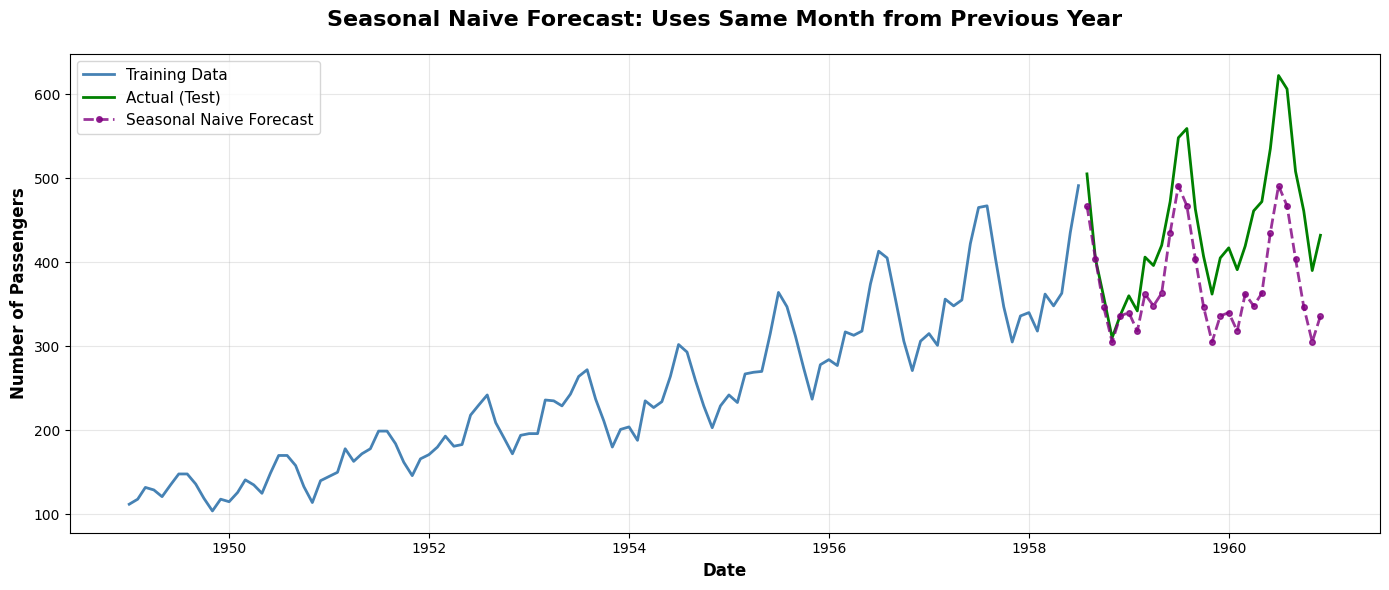


🔍 Observations:
✅ Captures seasonality (Notice the up and down pattern)
⚠️  Still misses the upward trend
💡 This is often the best simple method for seasonal data


In [17]:
# Visualize the seasonal naive forecast
plt.figure(figsize=(14, 6))
plt.plot(train.index, train['#Passengers'], linewidth=2, color='steelblue', label='Training Data')
plt.plot(test.index, test['#Passengers'], linewidth=2, color='green', label='Actual (Test)')
plt.plot(test.index, test['seasonal_naive_forecast'], linewidth=2, color='purple', 
         linestyle='--', label='Seasonal Naive Forecast', alpha=0.8, marker='o', markersize=4)
plt.title('Seasonal Naive Forecast: Uses Same Month from Previous Year', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Date', fontsize=12, fontweight='bold')
plt.ylabel('Number of Passengers', fontsize=12, fontweight='bold')
plt.legend(fontsize=11, loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n🔍 Observations:")
print("✅ Captures seasonality (Notice the up and down pattern)")
print("⚠️  Still misses the upward trend")
print("💡 This is often the best simple method for seasonal data")


## Section 4: Comparing All Three Methods

Let's see how all three methods compare side by side:


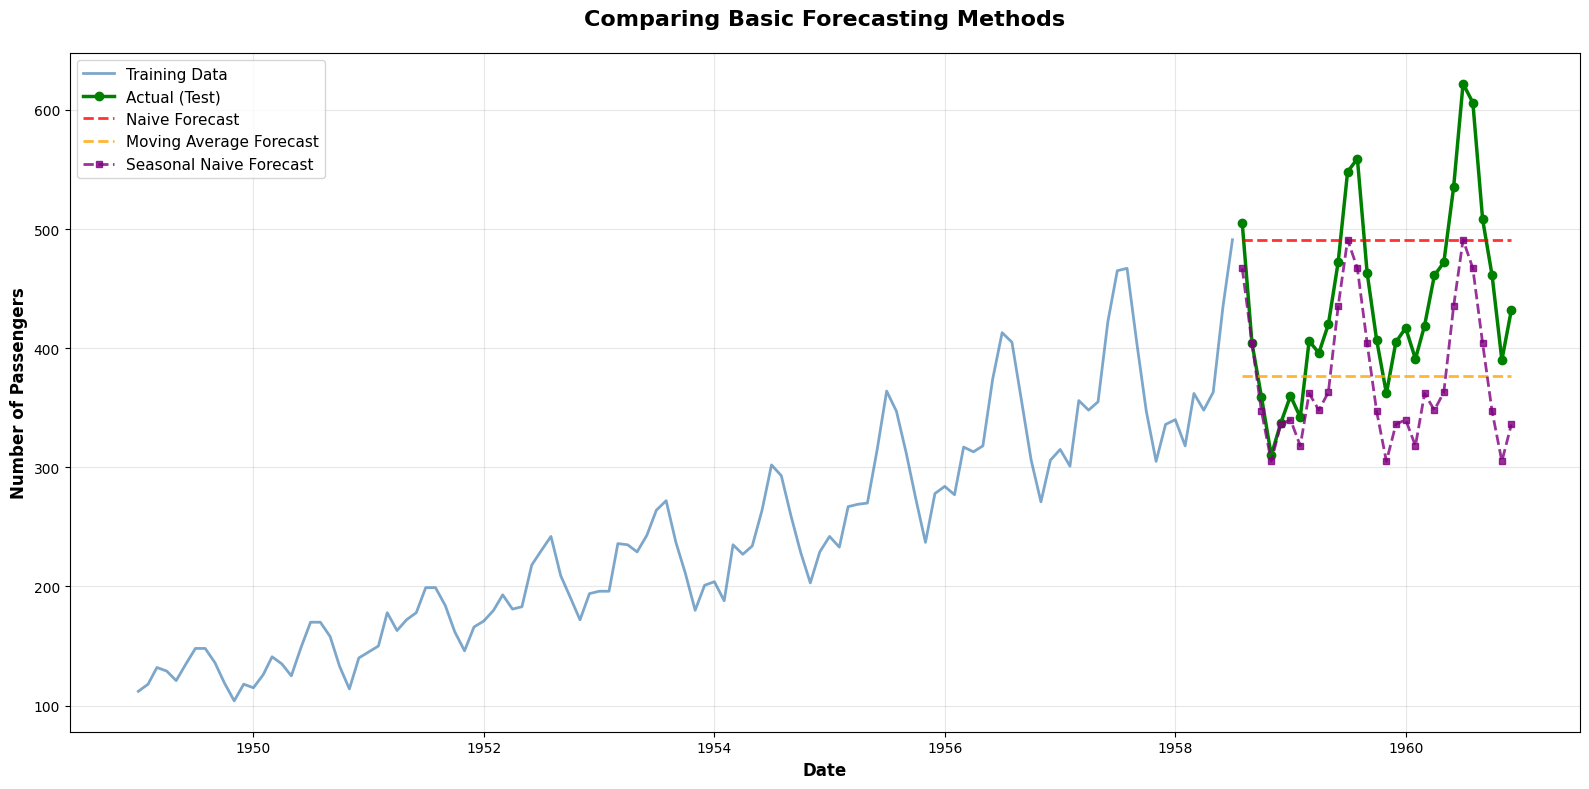


📊 Comparison Summary:
1. NAIVE: Flat line, misses everything
2. MOVING AVERAGE: Flat line, but uses more data
3. SEASONAL NAIVE: Captures seasonality, but misses trend

💡 For this data, seasonal naive is best because it captures seasonality
   But none of these capture the upward trend - we need better methods


In [18]:
# Compare all three methods
plt.figure(figsize=(16, 8))
plt.plot(train.index, train['#Passengers'], linewidth=2, color='steelblue', 
         label='Training Data', alpha=0.7)
plt.plot(test.index, test['#Passengers'], linewidth=2.5, color='green', 
         label='Actual (Test)', marker='o', markersize=6)
plt.plot(test.index, test['naive_forecast'], linewidth=2, color='red', 
         linestyle='--', label='Naive Forecast', alpha=0.8)
plt.plot(test.index, test['moving_avg_forecast'], linewidth=2, color='orange', 
         linestyle='--', label='Moving Average Forecast', alpha=0.8)
plt.plot(test.index, test['seasonal_naive_forecast'], linewidth=2, color='purple', 
         linestyle='--', label='Seasonal Naive Forecast', alpha=0.8, marker='s', markersize=4)
plt.title('Comparing Basic Forecasting Methods', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Date', fontsize=12, fontweight='bold')
plt.ylabel('Number of Passengers', fontsize=12, fontweight='bold')
plt.legend(fontsize=11, loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n📊 Comparison Summary:")
print("1. NAIVE: Flat line, misses everything")
print("2. MOVING AVERAGE: Flat line, but uses more data")
print("3. SEASONAL NAIVE: Captures seasonality, but misses trend")
print("\n💡 For this data, seasonal naive is best because it captures seasonality")
print("   But none of these capture the upward trend - we need better methods")


## Summary: Key Takeaways

This notebook introduced you to basic forecasting methods:

### What We Learned

1. **Naive Forecast:**
   - Simplest method: Tomorrow = Today
   - Good baseline for comparison
   - Works for stable, short-term forecasts

2. **Moving Average Forecast:**
   - Uses average of recent values
   - Smooths out noise
   - Better than naive for noisy data

3. **Seasonal Naive Forecast:**
   - Uses same season from previous year
   - Captures seasonality
   - Often best simple method for seasonal data

### Key Insights

- **Simple doesn't mean bad:** These methods are surprisingly useful
- **Baselines matter:** Always compare complex models to simple ones
- **Context matters:** Different methods work for different situations
- **Limitations:** Simple methods miss trends and complex patterns

### Why This Matters

Basic forecasting methods help you:
- Establish benchmarks for comparison
- Get quick forecasts when needed
- Understand what "good" forecasting looks like
- Communicate simply to stakeholders
